In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In C:\Users\OMEN\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\OMEN\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\OMEN\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\OMEN\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\OMEN\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

## Frequent Category Imputation
<b> Defination: </b>Frequent category imputation—or mode imputation—consists of replacing all occurrences of missing values (NA) within a variable with the mode, or the most frequent value.

<b> When to use</b>: You can use this method when data is missing completely at random, and no more than 5% of the variable contains missing data.

<b>Assumptions of frequent category imputation: </b>
* Data is missing at random.
* The missing observations most likely look like the majority of the observations (i.e. the mode).

In [4]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df = pd.read_csv('train.csv', usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BsmtQual,1423,4,TA,649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FireplaceQu,770,5,Gd,380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageType,1379,6,Attchd,870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice,1460.0,NaN,NaN,NaN,180921.19589,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


In [8]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [10]:
df.isnull().sum().sort_values(ascending = True)

SalePrice        0
BsmtQual        37
GarageType      81
FireplaceQu    690
dtype: int64

In [11]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:>

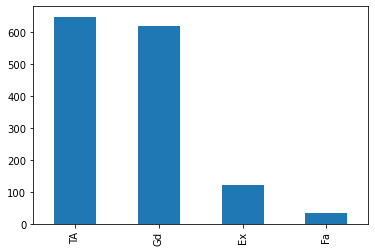

In [12]:
df['BsmtQual'].value_counts(ascending = False).plot.bar()

<AxesSubplot:>

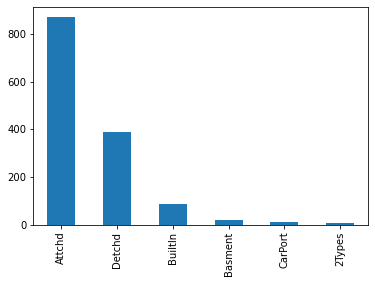

In [13]:
df['GarageType'].value_counts(ascending = False).plot.bar()

<AxesSubplot:>

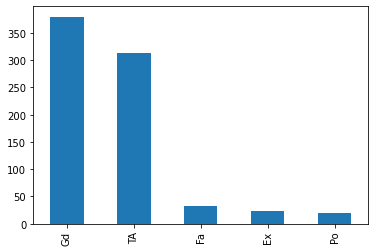

In [14]:
df['FireplaceQu'].value_counts(ascending = False).plot.bar()

In [19]:
df['GarageType'].mode()[0]

'Attchd'

In [22]:
def impute_nan(df, variable):
    frequent_category = df[variable].mode()[0]
    df[variable].fillna(frequent_category, inplace = True)

In [23]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df, feature)

In [24]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### Advantages of frequent category imputation
* Easy to implement.
* It’s a fast way to obtain a complete dataset.
* It can be used in production, i.e during model deployment.

#### Disadvantages of frequent category imputation
* It distorts the relation of the most frequent label with other variables within the dataset.
* May lead to an over-representation of the most frequent label if there is are a lot of missing observations.

### Adding a variable to capture NAN

In [13]:
df = pd.read_csv('train.csv', usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [14]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BsmtQual,1423,4,TA,649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FireplaceQu,770,5,Gd,380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageType,1379,6,Attchd,870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice,1460.0,NaN,NaN,NaN,180921.19589,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


In [15]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [16]:
df['BsmtQual_Var'] = np.where(df['BsmtQual'].isnull(), 1, 0)

In [17]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [20]:
frequent = df.BsmtQual.mode()[0]

In [21]:
df.BsmtQual.fillna(frequent, inplace = True)

In [22]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [23]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(), 1, 0)
frequent = df.FireplaceQu.mode()[0]
df['FireplaceQu'].fillna(frequent, inplace = True)

In [24]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


<b> Suppose if you have more frequent categories, we just replace NAN with a new category


In [25]:
df = pd.read_csv('train.csv', usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [28]:
def impute_nan(df, variable):
    df[variable+"_missing"] = np.where(df[variable].isnull(), 'Missing', df[variable]) 

In [29]:
for feature in ['BsmtQual','FireplaceQu','GarageType','SalePrice']:
    impute_nan(df, feature)

In [30]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_missing,FireplaceQu_missing,GarageType_missing,SalePrice_missing
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000


In [31]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType','SalePrice'], axis = 1)
df.head()

,BsmtQual_missing,FireplaceQu_missing,GarageType_missing,SalePrice_missing
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


### One Hot Encoding

In [32]:
df = pd.read_csv('titanic.csv', usecols = ['Sex'])
df

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [33]:
pd.get_dummies(df, drop_first = True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [34]:
df = pd.read_csv('titanic.csv', usecols = ['Embarked'])
df

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [35]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [36]:
df.dropna(inplace=True)

In [37]:
pd.get_dummies(df, drop_first = True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


### One Hot Encoding with many categories in a feature:
<b>Use KDD Cup Orange Challenge method</b>
* Take 10 most frequent catefories and apply one hot encoding

In [20]:
df = pd.read_csv('mercedes.csv', usecols = ["X0","X1","X2","X3","X4","X5","X6"])
df

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d
...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d
4205,j,o,t,d,d,aa,h
4206,ak,v,r,a,d,aa,g
4207,al,r,e,f,d,aa,l


In [21]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [22]:
df.X1.value_counts().sort_values(ascending = False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [23]:
df.X1.value_counts()

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
ab      3
d       3
q       3
Name: X1, dtype: int64

In [24]:
most_frequent = df.X1.value_counts().sort_values(ascending = False).head(10).index
most_frequent = list(most_frequent)

In [25]:
most_frequent

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [26]:
for categories in most_frequent:
    df[categories] = np.where(df['X1'] == categories, 1, 0)

In [27]:
most_frequent.append('X1')

In [31]:
df[most_frequent].head()

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v


## Ordinal Encoding

<b>Defination: </b>In ordinal encoding, each unique category value is assigned an integer value.

<b>For example,</b> “red” is 1, “green” is 2, and “blue” is 3.

This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used.

In [32]:
import datetime

In [33]:
todays_date = datetime.datetime.today()

In [34]:
todays_date

datetime.datetime(2021, 3, 11, 23, 7, 0, 372270)

In [37]:
# 20 days list 
days = [todays_date - datetime.timedelta(x) for x in range(0, 20)]

In [38]:
days

[datetime.datetime(2021, 3, 11, 23, 7, 0, 372270),
 datetime.datetime(2021, 3, 10, 23, 7, 0, 372270),
 datetime.datetime(2021, 3, 9, 23, 7, 0, 372270),
 datetime.datetime(2021, 3, 8, 23, 7, 0, 372270),
 datetime.datetime(2021, 3, 7, 23, 7, 0, 372270),
 datetime.datetime(2021, 3, 6, 23, 7, 0, 372270),
 datetime.datetime(2021, 3, 5, 23, 7, 0, 372270),
 datetime.datetime(2021, 3, 4, 23, 7, 0, 372270),
 datetime.datetime(2021, 3, 3, 23, 7, 0, 372270),
 datetime.datetime(2021, 3, 2, 23, 7, 0, 372270),
 datetime.datetime(2021, 3, 1, 23, 7, 0, 372270),
 datetime.datetime(2021, 2, 28, 23, 7, 0, 372270),
 datetime.datetime(2021, 2, 27, 23, 7, 0, 372270),
 datetime.datetime(2021, 2, 26, 23, 7, 0, 372270),
 datetime.datetime(2021, 2, 25, 23, 7, 0, 372270),
 datetime.datetime(2021, 2, 24, 23, 7, 0, 372270),
 datetime.datetime(2021, 2, 23, 23, 7, 0, 372270),
 datetime.datetime(2021, 2, 22, 23, 7, 0, 372270),
 datetime.datetime(2021, 2, 21, 23, 7, 0, 372270),
 datetime.datetime(2021, 2, 20, 23, 7, 0

In [39]:
data = pd.DataFrame(days)
data.columns = ['Day']

In [40]:
data.head()

,Day
0,2021-03-11 23:07:00.372270
1,2021-03-10 23:07:00.372270
2,2021-03-09 23:07:00.372270
3,2021-03-08 23:07:00.372270
4,2021-03-07 23:07:00.372270


In [47]:
data['weekday']=data['Day'].dt.day_name()
data.head()

,Day,weekday
0,2021-03-11 23:07:00.372270,Thursday
1,2021-03-10 23:07:00.372270,Wednesday
2,2021-03-09 23:07:00.372270,Tuesday
3,2021-03-08 23:07:00.372270,Monday
4,2021-03-07 23:07:00.372270,Sunday


In [48]:
week_days = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

In [49]:
week_days

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [50]:
data['weekday_ordinal'] = data['weekday'].map(week_days)

In [51]:
data.head()

,Day,weekday,weekday_ordinal
0,2021-03-11 23:07:00.372270,Thursday,4
1,2021-03-10 23:07:00.372270,Wednesday,3
2,2021-03-09 23:07:00.372270,Tuesday,2
3,2021-03-08 23:07:00.372270,Monday,1
4,2021-03-07 23:07:00.372270,Sunday,7


## Count or frequency encoding
<b>Defination: </b>Replace the categories by the count of the observations that show that category in the dataset. Similarly, we can replace the category by the frequency -or percentage- of observations in the dataset.

In [53]:
df = pd.read_csv('adult.data', header = None, index_col = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [55]:
# Taking out categorical features
columns = [1,3,5,6,7,8,9,13]

In [56]:
df = df[columns]

In [61]:
df.columns = ['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [62]:
df.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [63]:
for feature in df.columns[:]:
    print(feature, ":", len(df[feature].unique()), 'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [65]:
df['Country'].value_counts().to_dict()

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' Greece': 29,
 ' France': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Trinadad&Tobago': 19,
 ' Cambodia': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Hungary': 13,
 ' Honduras': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [66]:
country_map = df['Country'].value_counts().to_dict()

In [67]:
df['Country'] = df['Country'].map(country_map)

In [68]:
df.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


#### Advantages 
* Straightforward to implement.
* Does not expand the feature space.
* Can work well with tree-based algorithms.

#### Disadvantages
* Not suitable for linear models.
* Does not handle new categories in the test set automatically.
* We can lose valuable information if there are two different categories with the same amount of observations count—this is because we replace them with the same number.

## Target Guided Ordinal Encoding¶
<b>Defination: </b>Target encoding means replacing the category with the mean target value for that category.

We start by grouping each category alone, and for each group, we calculate the mean of the target in the corresponding observations. Then we assign that mean to that category. Thus, we encoded the category with the mean of the target.

In [40]:
df = pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [41]:
df['Cabin'].fillna('Missing', inplace = True)

In [42]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [43]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [44]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [45]:
#probablity of person surviving in a perticular cabin 
df.groupby(df['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [46]:
df.groupby(df['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [47]:
df.groupby(df['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [48]:
ordinal_labels = df.groupby(df['Cabin'])['Survived'].mean().sort_values().index

In [49]:
# give ranking to the labels
ordinal_labels = {k:i for i,k in enumerate(ordinal_labels, 0)}

In [50]:
ordinal_labels

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [51]:
df['Cabin_ordinal_labels'] = df['Cabin'].map(ordinal_labels)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


#### Disadvantages: 
* It can lead to target leakage or overfitting. To address overfitting we can use different techniques.
<pre>1. In the leave one out encoding, the current target value is reduced from the overall mean of the target to avoid leakage.</pre>
<pre>2.In another method, we may introduce some Gaussian noise in the target statistics. The value of this noise is hyperparameter to the model.</pre>

* The second issue, we may face is the improper distribution of categories in train and test data. In such a case, the categories may assume extreme values. Therefore the target means for the category are mixed with the marginal mean of the target.

## Mean Encoding
<b> Defination: </b> mean encoding represents a probability of your target variable, conditional on each value of the feature. In a way, it embodies the target variable in its encoded value.

<b> How does it work? </b> Unlike regular encoding, which has no real meaning to the labels, mean encoding imposes an ordering. This allows you to reduce your loss while using shorter trees.



In [55]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()


In [56]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [58]:
df['Mean_ordinal_encoding'] = df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode,Mean_ordinal_encoding
0,0,M,1,0.299854,0.299854
1,1,C,4,0.593220,0.593220
2,1,M,1,0.299854,0.299854
3,1,C,4,0.593220,0.593220
4,0,M,1,0.299854,0.299854


### Advantages
* Capture information within the label, therefore rendering more predictive features
* Creates a monotonic relationship between the variable and the target

#### Disadvantages
* It may cause over-fitting in the model.

### Probability Ratio Encoding
This encoding is suitable for classification problems only, where the target is binary.

For each category, we calculate the mean of the target <b>= 1</b>, which is the probability of the target being <b>1 (P(1)),</b> and the probability of the target being <b>0 (P(0))</b>.

Finally, we calculate the ratio <b>= P(1)/P(0)</b>, and we replace the categories by that ratio.

In [65]:
df = pd.read_csv('titanic.csv', usecols = ['Cabin', 'Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [66]:
df['Cabin'].fillna('Missing', inplace = True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [67]:
df.Cabin.unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [68]:
df['Cabin'] = df.Cabin.astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [69]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [70]:
prob_df = df.groupby(df['Cabin'])['Survived'].mean()
prob_df

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [71]:
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [74]:
#probablity of died 
prob_df['Died'] = 1 - prob_df['Survived']
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [75]:
# probability ratio
prob_df['Probability_Ratio'] = prob_df['Survived'] / prob_df['Died']
prob_df.head()

,Survived,Died,Probability_Ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [82]:
encoded_prob = prob_df['Probability_Ratio'].to_dict()
encoded_prob

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [83]:
df['Cabin_encoded']=df['Cabin'].map(encoded_prob)
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


#### Advantages 
* Captures information within the category, and therefore creates more predictive features.
* Creates a monotonic relationship between the variables and the target. So it’s suitable for linear models.
* Does not expand the feature space.

#### Advantages
* Likely to cause overfitting.
* Not defined when the denominator is 0.